<a target="_blank" href="https://colab.research.google.com/github/ArtificialIntelligenceToolkit/aitk/blob/master/notebooks/Advanced/DogsVsCats.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install aitk --quiet

In [14]:
from aitk.utils.datasets import get_dataset
from aitk.utils import array_to_image
from aitk.networks import SequentialNetwork, Conv2D
from PIL import Image
import numpy as np

In [15]:
inputs, targets = get_dataset("dogs-vs-cats")

In [16]:
inputs.shape

(24478, 128, 128, 3)

In [17]:
targets.shape

(24478, 2)

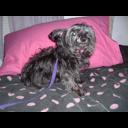

In [18]:
array_to_image(inputs[0])

In [19]:
network = SequentialNetwork(
    (128, 128, 3), 
    Conv2D(2, 3, activation="relu", name="conv2d"),
    "Flatten", 
    (100, "relu"), 
    (10, "relu"), 
    (2, "softmax"),
    loss="binary_crossentropy",
    optimizer="adam",
)

In [20]:
network.summary()

Model: "SequentialNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 126, 126, 2)    │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 31752)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_3 (Dense)                │ (None, 100)            │     3,175,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_4 (Dense)                │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,176,388 (12.12 MB)

 Trainable params: 3,176,388 (12.12 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
network.config["layers"]["conv2d"]["feature"] = 1

In [21]:
network.propagate(inputs[0])

[0.5129900574684143, 0.4870099127292633]


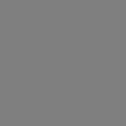
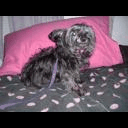

In [24]:
network.display(inputs[0], scale=0.75)

In [25]:
SIZE = 10
sample_inputs =  np.concatenate((inputs[:SIZE], inputs[-SIZE:]))
sample_targets = np.concatenate((targets[:SIZE], targets[-SIZE:]))

In [26]:
sample_targets.shape

(20, 2)

In [27]:
network.fit(
    sample_inputs,
    sample_targets,
    epochs=500,
    accuracy=1.0,
    report_rate=5,
)

Stopped because accuracy beat goal of 1.0
Epoch 14/500 loss: 0.09768255800008774 - tolerance_accuracy: 1.0



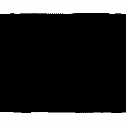
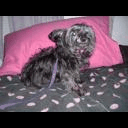

In [29]:
network.display(inputs[0], scale=0.75)